In [1]:
import pandas as pd

df = pd.read_csv("data_unified_v2-5-1.csv",engine='python')

df.head()


,Unnamed: 0,Review,address,author,author_loc,date,origin,rating,restaurant,type,region
0,0,Visited on a day without Unagi *0*Location: 4/...,"7500A Beach Road The Plaza #B1-310, The Plaza,...",ML-SG-001,"Singapore, Singapore",8/10/2020,TripAdvisor,2,Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL
1,1,"Since my visit to Sushi Kimura, I had this str...","7500A Beach Road The Plaza #B1-310, The Plaza,...",morsels-of-delice,"Singapore, Singapore",10/30/2019,TripAdvisor,5,Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL
2,2,We enjoyed our meal very much. The uni platter...,"7500A Beach Road The Plaza #B1-310, The Plaza,...",baolover,"Singapore, Singapore",7/26/2020,TripAdvisor,5,Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL
3,3,"Came here during Stage 2 CB period , Oosterbay...","7500A Beach Road The Plaza #B1-310, The Plaza,...",Tan T,"Singapore, Singapore",7/23/2020,TripAdvisor,5,Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL
4,4,A highly recommended good Japanese restaurant ...,"7500A Beach Road The Plaza #B1-310, The Plaza,...",WSJJ,"Singapore, Singapore",7/3/2020,TripAdvisor,5,Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL


In [4]:
print("Number of Reviews: ", len(df['Review']))
print("Number of Restaurants: ", len(df.sort_values(['restaurant'], ascending = [True]).groupby('restaurant').first().reset_index()))

Number of Reviews:  202533
Number of Restaurants:  2176


In [75]:
from nltk import FreqDist
import string
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/drake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/drake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/drake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
reviews = df['Review'].str.cat(sep=' ')

In [30]:
words = nltk.tokenize.word_tokenize(reviews)

In [31]:
fdist = FreqDist(words)

In [34]:
fdist.most_common(20)

[('.', 883380),
 ('the', 738479),
 ('and', 564954),
 (',', 541999),
 ('a', 380710),
 ('to', 353265),
 ('was', 308429),
 ('of', 262448),
 ('is', 234352),
 ('for', 213012),
 ('I', 209591),
 ('in', 164311),
 ('with', 162370),
 ('The', 159837),
 ('!', 152565),
 ('it', 150802),
 ('food', 139388),
 ('we', 116897),
 ('were', 109887),
 ('good', 102363)]

In [69]:
stop = stopwords.words('english') + nltk.tokenize.word_tokenize(string.punctuation+"’“”.") + ["...","'s","us","would","also","-",'``',"'ve","'d","'ll","n't"]
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [70]:
filtered = [w.lower() for w in words if not w.lower() in stop] 

In [71]:
fdist = FreqDist(filtered)
fdist.most_common(50)

[('food', 158081),
 ('good', 112765),
 ('service', 94967),
 ('great', 73070),
 ('restaurant', 68572),
 ('place', 61686),
 ('staff', 49972),
 ('one', 46296),
 ('singapore', 44563),
 ('really', 39911),
 ('time', 38856),
 ('nice', 38849),
 ('like', 36668),
 ('well', 35144),
 ('back', 33765),
 ('dinner', 32145),
 ('menu', 31601),
 ('experience', 30808),
 ('dishes', 30236),
 ('excellent', 30026),
 ('best', 28180),
 ('go', 28157),
 ('friendly', 26844),
 ('table', 26041),
 ('try', 25436),
 ('delicious', 25432),
 ('get', 25154),
 ('lunch', 24754),
 ('ordered', 24542),
 ('definitely', 24130),
 ('meal', 23188),
 ('chicken', 23159),
 ('even', 22531),
 ('visit', 21888),
 ('quality', 21683),
 ('taste', 20825),
 ('served', 20773),
 ('went', 20640),
 ('could', 20243),
 ('much', 19502),
 ('wine', 19250),
 ('recommend', 18964),
 ('come', 18904),
 ('came', 18900),
 ('order', 18831),
 ('quite', 18823),
 ('made', 18778),
 ('price', 18512),
 ('first', 18491),
 ('dish', 18485)]

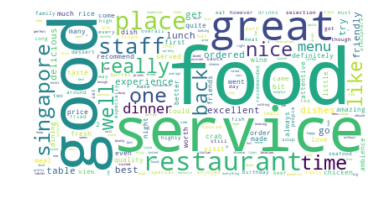

In [74]:
wc = WordCloud(background_color="white").generate_from_frequencies(fdist)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
def generatewordcloud(wordlist):
    reviews = wordlist.str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(reviews)
    stop = stopwords.words('english') + nltk.tokenize.word_tokenize(string.punctuation+"’“”.") + ["...","'s","us","would","also","-",'``',"'ve","'d","'ll","n't"]
    filtered = [w.lower() for w in words if not w.lower() in stop] 
    fdist = FreqDist(filtered)

    wc = WordCloud(background_color="white").generate_from_frequencies(fdist)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

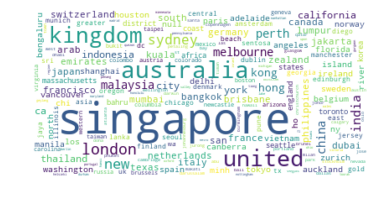

In [77]:
generatewordcloud(df['author_loc'])

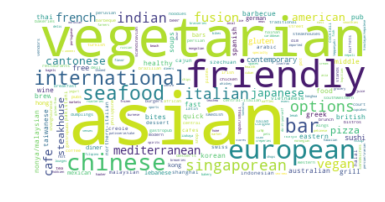

In [78]:
generatewordcloud(df['type'])

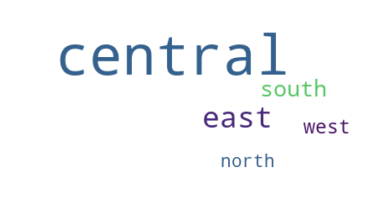

In [79]:
generatewordcloud(df['region'])

In [80]:
df2 = pd.read_csv("subtypes.csv",engine='python')

df2.head()

,address,restaurant,type,region,food_subtype
0,"7500A Beach Road The Plaza #B1-310, The Plaza,...",Uni Gallery by OosterBay,"Japanese,Sushi,Asian",CENTRAL,unagi#soup#fish#seafood#salad#egg#oyster#sushi...
1,"27 Seah Street # 01-01, Singapore 188383 Singa...",Entre Nous Creperie,"French,European,Healthy",CENTRAL,crepe#caramel#sweet crepe#soup#onion soup#shri...
2,1 Nanson Road Intercontinental Singapore Rober...,Publico Ristorante,"Italian,Pizza,International",CENTRAL,pizza#burrata#chorizo#truffle#italian#tagliate...
3,"21 Amber Road # 03 Chinese Swimming Club 01, S...",Fu Lin Men (CSC),"Chinese,Asian,Cantonese",EAST,duck#peking duck#tim sum#chinese#chinese cuisi...
4,22 Scotts Road Goodwood Park Hotel Goodwood Pa...,Alma By Juan Amador,"European,Fusion,Vegetarian Friendly",CENTRAL,dessert#whisky#bread#michelin#fine dining#mich...


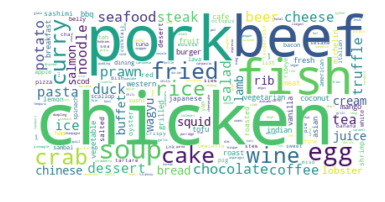

In [81]:
generatewordcloud(df2['food_subtype'])